In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

([Text(0.98, 0.98, 'WC'), Text(0.98, 0.9299999999999999, 'NON-WC')],
  <matplotlib.lines.Line2D at 0x7fdad191f430>])

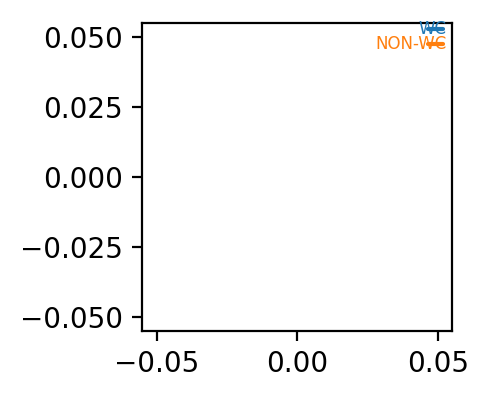

In [62]:
def custom_legend(ax, labels, colors=None, loc="upper right", fontsize=10, linewidth=1.5, spacing=0.2):
    """
    Create a custom legend for the given axes using ax.text and line handles.

    Parameters:
        ax: matplotlib Axes object
        labels: list of str, legend labels
        colors: list of str or None, colors for each label (default: matplotlib default cycle)
        loc: str, legend location ("upper right", "upper left", etc.)
        fontsize: int, font size for legend text
        linewidth: float, line width for legend handles
        spacing: float, vertical spacing between legend entries (axes fraction)

    Returns:
        texts: list of created text objects
        lines: list of created line objects
    """
    if colors is None:
        colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    # Determine anchor point based on loc
    loc_dict = {
        "upper right": (0.98, 0.98, "right", "top"),
        "upper left": (0.02, 0.98, "left", "top"),
        "lower right": (0.98, 0.02, "right", "bottom"),
        "lower left": (0.02, 0.02, "left", "bottom"),
        "center right": (0.98, 0.5, "right", "center"),
        "center left": (0.02, 0.5, "left", "center"),
        "center": (0.5, 0.5, "center", "center"),
        "upper center": (0.5, 0.98, "center", "top"),
        "lower center": (0.5, 0.02, "center", "bottom"),
    }
    x0, y0, ha, va = loc_dict.get(loc, (0.98, 0.98, "right", "top"))

    texts = []
    lines = []
    n = len(labels)
    for i, (label, color) in enumerate(zip(labels, colors)):
        # Calculate y position for each entry
        y = y0 - i * spacing if va == "top" else y0 + i * spacing
        # Add line handle
        line = ax.plot(
            [x0 - 0.06, x0 - 0.01], [y, y],
            color=color, lw=linewidth, solid_capstyle='round',
            transform=ax.transAxes, clip_on=False, zorder=10
        )[0]
        lines.append(line)
        # Add text
        text = ax.text(
            x0, y, label,
            color=color,
            fontsize=fontsize,
            ha=ha, va="center",
            transform=ax.transAxes,
            zorder=11
        )
        texts.append(text)
    return texts, lines

fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
custom_legend(ax, ["WC", "NON-WC"], fontsize=6, spacing=0.05)

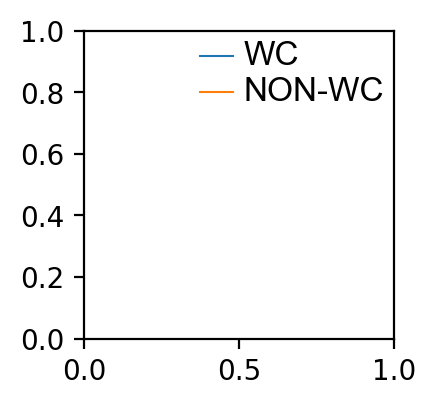

In [56]:
def add_legend(ax, labels, loc="upper right", fontsize=6):
    handles = []
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    for label, color in zip(labels, colors):
        patch = mlines.Line2D([], [], color=color, lw=0.75, label=label)
        handles.append(patch)
    arial_font = {"family": "Arial", "size": fontsize}

    # Scale distances based on fontsize (assuming default fontsize=6 for original values)

    legend = ax.legend(
        handles=handles,
        frameon=False,
        loc=loc,
        handlelength=1.0,
        handleheight=0.1,
        handletextpad=0.30,
        borderaxespad=-0.10,  # as close as possible to axes
        prop=arial_font,
        labelspacing=0.15,  # reduce space between lines in legend
    )
    return legend

fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
add_legend(ax, ["WC", "NON-WC"], fontsize=12)

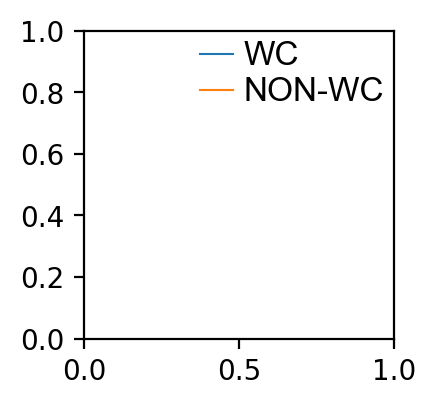

Line2D(_child0)


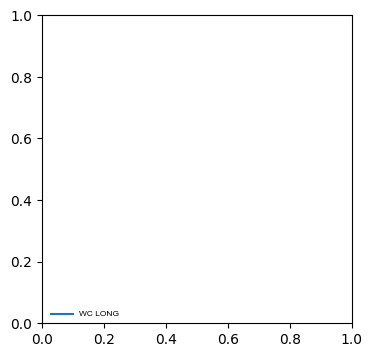

In [100]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
line = ax.plot([0.03, 0.10], [0.03, 0.03], transform=ax.transAxes)[0]
ax.text(0.12, 0.03, "WC LONG", transform=ax.transAxes, ha="left", va="center", fontsize=6, fontfamily="Arial")
print(line)